<a href="https://colab.research.google.com/github/ehughe33/DTSC-2302-Project-Group-1/blob/main/DTSC1302Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DTSC 1302 Project

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
url = "https://raw.githubusercontent.com/ehughe33/DTSC-2302-Project-Group-1/main/adult.data"
df = pd.read_csv(url, header=None,names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class'])  # Use header=None if the file has no header row
print(f"# of rows in data: {df.shape[0]}, # columns in data: {df.shape[1]}")
df.head(2)

# of rows in data: 32561, # columns in data: 15


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [ ]:
df["class"].value_counts()[]/(df["class"].value_counts()[1]+df["class"].value_counts()[0])

<ipython-input-6-c825f3e6897a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["class"].value_counts()[1]/(df["class"].value_counts()[1]+df["class"].value_counts()[0])
<ipython-input-6-c825f3e6897a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["class"].value_counts()[1]/(df["class"].value_counts()[1]+df["class"].value_counts()[0])
<ipython-input-6-c825f3e6897a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df["class"].

0.2408095574460244

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# finding unique values for each columnn to identify problematic values

for column in df.columns:
  print(f"\nUnique values in column {column}: \n{df[column].unique()}")


Unique values in column age: 
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]

Unique values in column workclass: 
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

Unique values in column fnlwgt: 
[ 77516  83311 215646 ...  34066  84661 257302]

Unique values in column education: 
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Unique values in column education-num: 
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values in column marital-status: 
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Unique values in 

# Data Cleansing

### Dealing With Null Values

In [ ]:
# Strip whitespace from the entire DataFrame to handle spaces around "?"
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
# Replace "?" with NaN
df.replace('?', np.nan, inplace=True)
# Printing missing values by column
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64


In [ ]:
rows_with_null = df.isnull().any(axis=1).sum()
print(f"Number of rows with null values: {rows_with_null}")

Number of rows with null values: 2399


In [ ]:
# Check how many people that have "na" for workclass have income more than 50k
null_workclass_high_income = df[(df['workclass'].isnull()) & (df['class'] == '>50K')]
# Count the number of such entries
num_entries = null_workclass_high_income.shape[0]

print(f"Number of entries where 'workclass' is null and 'class' is '>=50k': {num_entries}")

Number of entries where 'workclass' is null and 'class' is '>=50k': 191


Only 191 people have income greater than $50k

In [ ]:
# Count the number of entries where both 'workclass' and 'occupation' are NaN
num_na_entries = df[df['workclass'].isna() & df['occupation'].isna()].shape[0]

print(f"Number of entries with NaN in both 'workclass' and 'occupation': {num_na_entries}")


Number of entries with NaN in both 'workclass' and 'occupation': 1836


In [ ]:
# Visualizing missing entries
missing_workclass_occupation = df[df['workclass'].isna() & df['occupation'].isna()]
#na_entries.sort_values(by = "hours-per-week", ascending=True)

# Checking median weekly working hours for people with missing 'workclass' and 'occupation'
median_hours = missing_workclass_occupation['hours-per-week'].median()

print(f"Median weekly working hours for people with missing 'workclass' and 'occupation': {median_hours}")

Median weekly working hours for people with missing 'workclass' and 'occupation': 36.0


Based on this we can not say that people with missing 'workclass' and 'occupation' entries are unemployed

#### There are however, 7 missing entries for 'occupation' which do seem to be characteristics of the data, as all of the people with missing values for their occupation have 'Never-worked' as their 'workclass', which sounds reasonable.

In [ ]:
df[(df["workclass"].notnull()) & (df["occupation"].isna())]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
5361,18,Never-worked,206359,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,<=50K
10845,23,Never-worked,188535,7th-8th,4,Divorced,NaN,Not-in-family,White,Male,0,0,35,United-States,<=50K
14772,17,Never-worked,237272,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
20337,18,Never-worked,157131,11th,7,Never-married,NaN,Own-child,White,Female,0,0,10,United-States,<=50K
23232,20,Never-worked,462294,Some-college,10,Never-married,NaN,Own-child,Black,Male,0,0,40,United-States,<=50K
32304,30,Never-worked,176673,HS-grad,9,Married-civ-spouse,NaN,Wife,Black,Female,0,0,40,United-States,<=50K
32314,18,Never-worked,153663,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,4,United-States,<=50K


In [ ]:
df.loc[df['workclass']=="Never-worked", 'occupation'] = 'Never-worked' # replace null with Never-worked where occupation is also 'Never-worked'

#### After trying to group the amount of null values in 'native-country' into different categories, it does not appear that native-country being null is a feature of the data and is quite random and follows the distribution of the data.

In [ ]:
null_country_df = df[df["native-country"].isna()].groupby("sex").count() # replace 'sex' with different column names to try
null_country_df.rename(columns={"class":"# Null Entries for native-country"}, inplace=True)
null_country_df["# Null Entries for native-country"]

,# Null Entries for native-country
sex,
Female,163
Male,420


#### As found earlier, these are the unique values within the **'native-country'** column

['United-States' 'Cuba' 'Jamaica' 'India' nan 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']

There are **two problems** with this to be noted,

1. **"South"** is not a valid country name, however we found that %96.25 of people with 'native-country'=='South' are of the race Asian-Pac-Islander. Thus it is reasonable to say that 'South' refers to 'South Korea' as no other Asian country starts with 'South'
2. **'Hong'** is listed as a native country when the correct name is 'Hong Kong'



In [ ]:
df[df["native-country"]=="South"]["race"].value_counts()

,count
race,
Asian-Pac-Islander,77
Amer-Indian-Eskimo,2
White,1


In [ ]:
df.replace("Hong", "Hong-Kong", inplace=True) # replacing 'Hong' with 'Hong-Kong' for accuracy
df.replace("South", "South-Korea", inplace=True) # replacing South with South-Korea using knowledge that 96% of people from "South" are Asian

In [ ]:
df.replace("<=50K", 0, inplace=True)
df.replace(">50K", 1, inplace=True)
df.head(1)

<ipython-input-15-57151222788c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(">50K", 1, inplace=True)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0


In [ ]:
df["net-capital"] = df["capital-gain"] - df["capital-loss"]
df.drop(columns=["capital-gain", "capital-loss"], inplace=True)

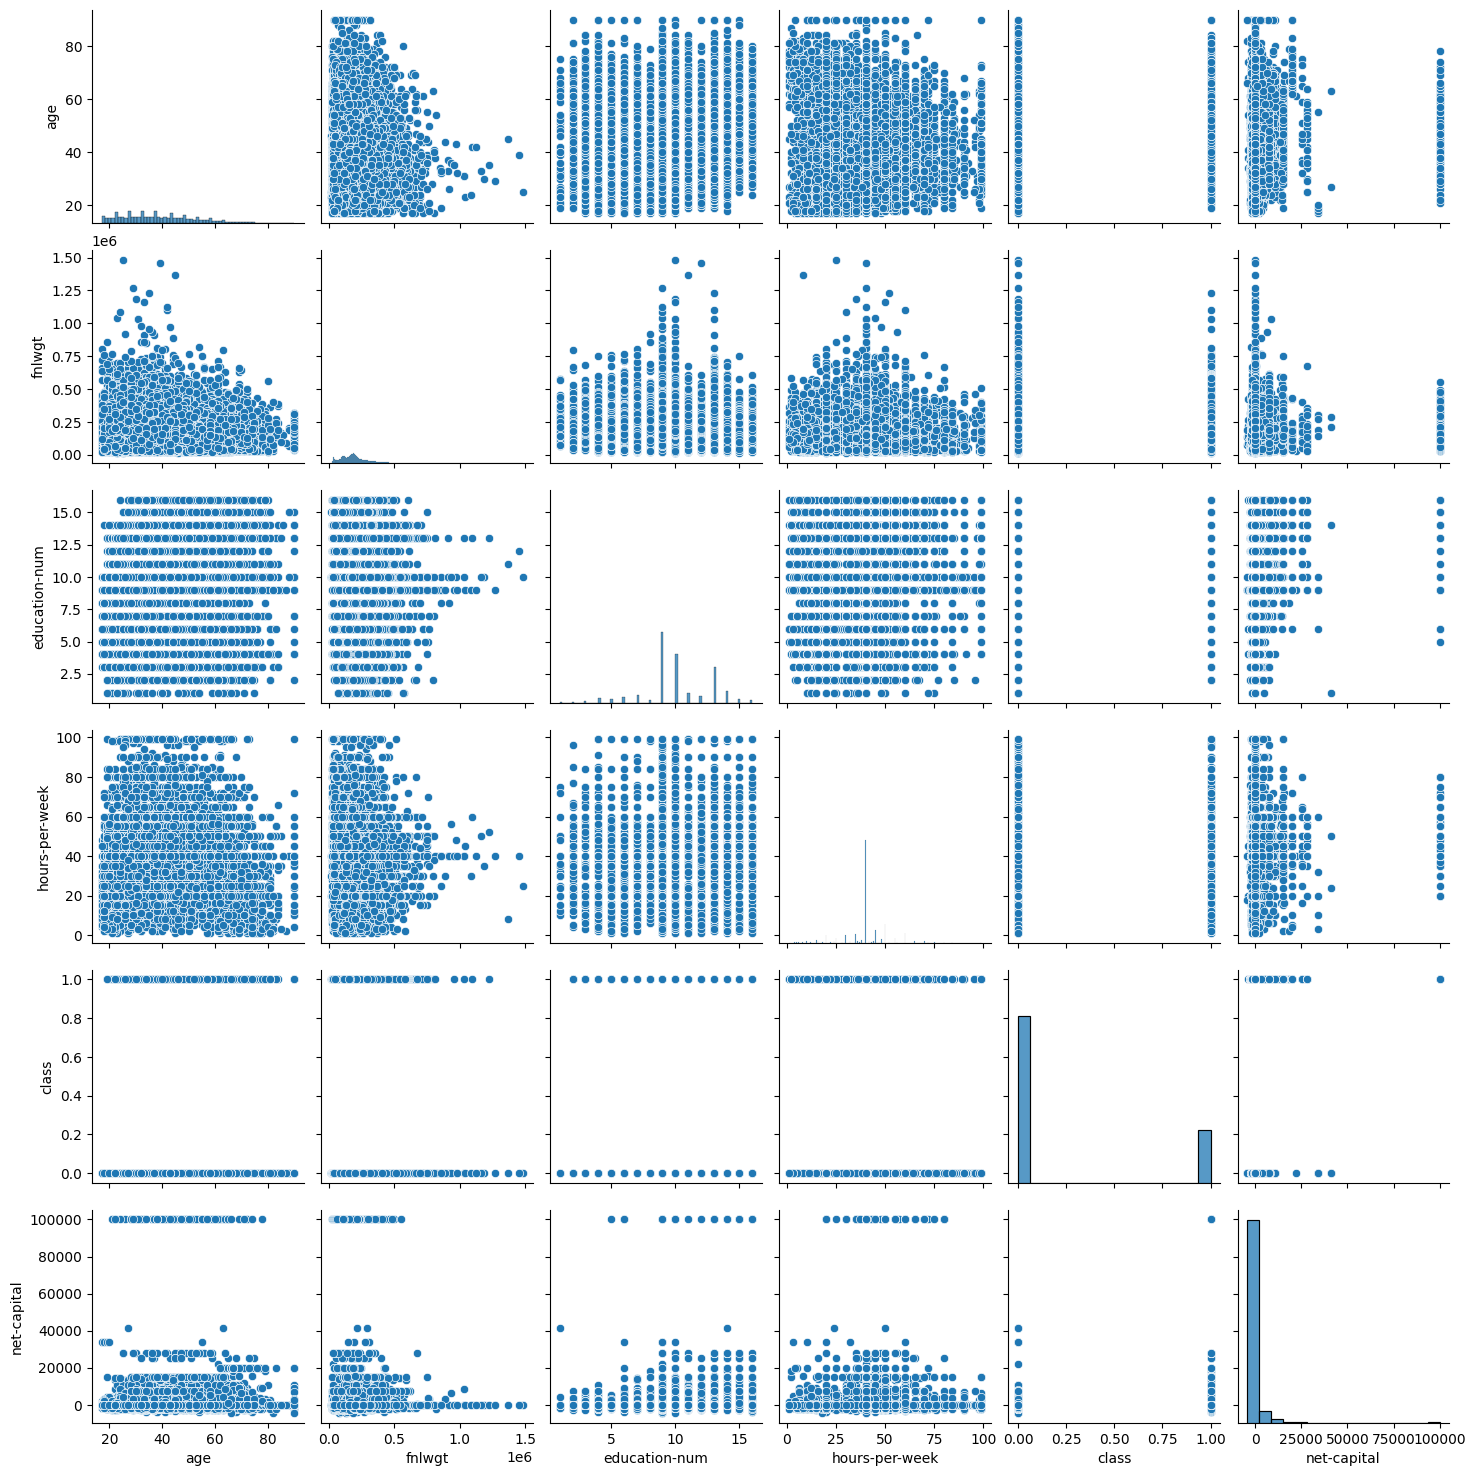

In [ ]:
sns.pairplot(df)

In [ ]:
# Dropping all NA's
df = df.dropna()

# We decided to drop all rows that had null values since these rows only made up ~7%
# of our data. This should not affect our findings or our model accuracy substantially.

We see the most correlated numerical variables with wether or not someone makes over 50k or not are education-num, age, and hours per week. One interesting thing is that there is a slight positive corrleation between capital loss and somoene making over 50k. This suggests that losing money/capital makes it more likely that you make over 50k. While this sounds backwards, this makese sense since wealthier individuals have more money to lose and are more comfortable with risking it with things such as investing.

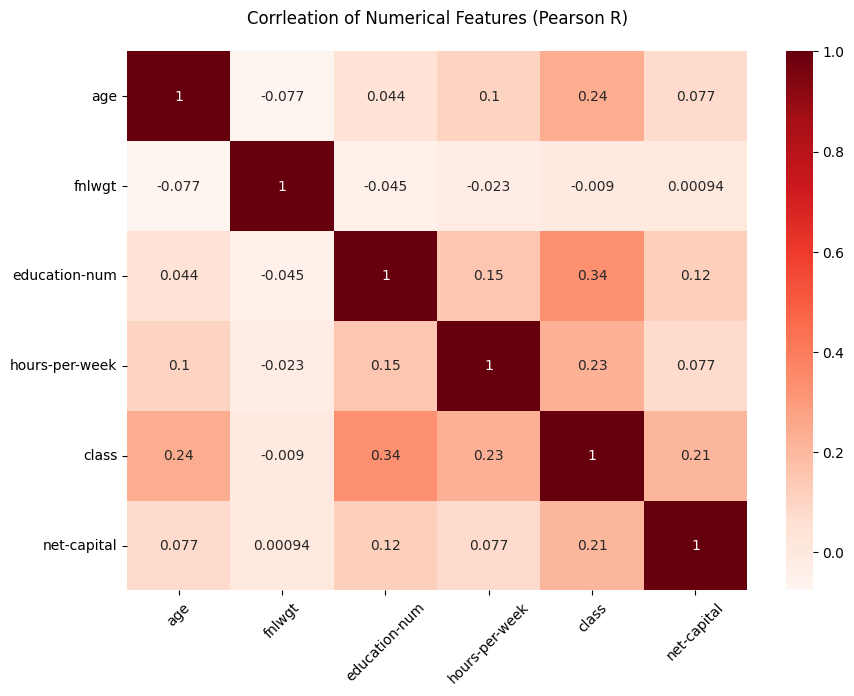

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(numeric_only=True), cmap="Reds", annot=True)
plt.title("Corrleation of Numerical Features (Pearson R)", pad=20)
plt.xticks(rotation=45)
plt.show()

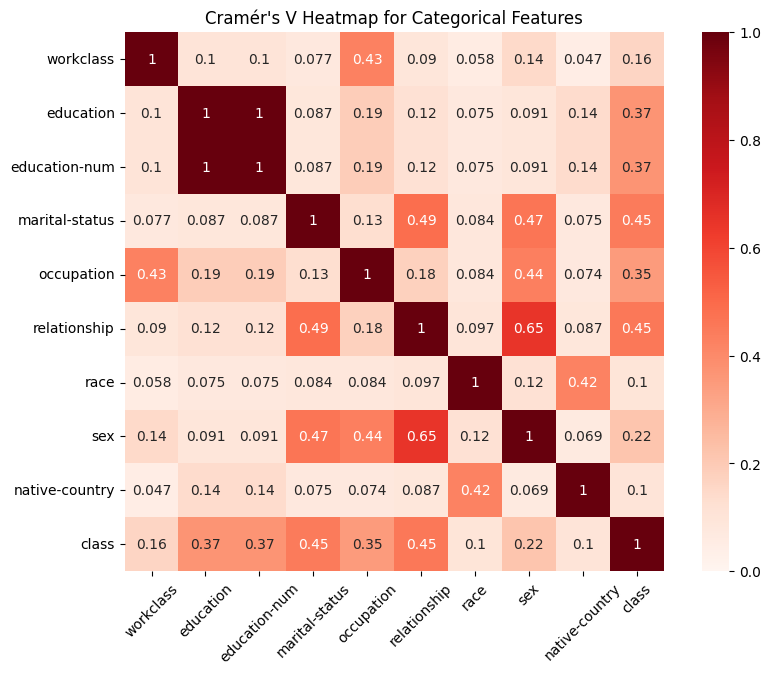

In [ ]:
from scipy.stats import chi2_contingency

# Define categorical features, including the dependent variable 'class'
categorical_features = ['workclass', 'education', 'education-num', 'marital-status',
                        'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']

# Function to calculate Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Create a DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

# Calculate Cramér's V for each pair of categorical features
for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            cramers_v_matrix.loc[col1, col2] = 1.0
        else:
            cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

# Convert matrix values to floats
cramers_v_matrix = cramers_v_matrix.astype(float)

# Plot the Cramér's V matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cramers_v_matrix, annot=True, cmap="Reds", vmin=0, vmax=1, square=True)
plt.xticks(rotation=45)
plt.title("Cramér's V Heatmap for Categorical Features")
plt.show()

In [ ]:
import plotly.express as px
def plot_percent_over_50k(category: str) -> None:
  """
  This function takes in a string that represnts a categorical column within the dataset and produces a plotly bar graph
  of the percent of people within that category that make more than 50k.
  """
  total_df = df.groupby(by=[category])  # entire df grouped by category
  approved_df = df[df["class"]==1].groupby(by=[category])  # df of people making over 50k grouped by same category
  percent_df = approved_df.size()/total_df.size()
  fig = px.bar(percent_df)
  fig.update_layout(title={
                      "text": f"Percent Making $>50k by {category.title()} Category",
                      "x": 0.5,
                      "xanchor": "center"
                    },
                    yaxis_title="% Making More than 50k",
                    showlegend=False,
                    template="plotly_dark",
                    width = 800,
                    height = 500)
  fig.show()

plot_percent_over_50k("sex")

## Do Men Make More Than Women?

#### Based on this graph, it may be tempting to claim that men make more than women, however this may be based on many factors such as education level, job sector, etc. Lets investigate.

In [ ]:
total_df = df.groupby(by=["occupation", "sex"])  # entire df grouped by category
approved_df = df[df["class"]==1].groupby(by=["occupation", "sex"])  # df of people making over 50k grouped by same category
percent_df = (approved_df.size()/total_df.size()).reset_index()
percent_df.sort_values(by=0, ascending=False, inplace=True)
percent_df = percent_df.iloc[::-1]

fig = px.bar(percent_df,
             x="occupation",
             y=0, color="sex",
             barmode="group",
             color_discrete_map={"Male": "#EF553B", "Female": "#636EFA"} )

fig.update_layout(title={
                    "text": f"% Earning >$50k by Occupation",
                    "x": 0.5,
                    "xanchor": "center"
                  },
                  yaxis_title="% Making More than 50k",
                  xaxis_title="",
                  showlegend=True,
                  template="plotly_dark",
                  width = 800,
                  height = 500
                  )
fig.show()

In [ ]:
total_df = df.groupby(by=["education", "sex"])  # entire df grouped by category
approved_df = df[df["class"]==1].groupby(by=["education", "sex"])  # df of people making over 50k grouped by same category
percent_df = (approved_df.size()/total_df.size()).reset_index()
fig = px.bar(percent_df, x="education", y=0, color="sex", barmode="group")
fig.update_layout(title={
                    "text": f"Percent of People Making $>50k by Education & Sex",
                    "x": 0.5,
                    "xanchor": "center"
                  },
                  yaxis_title="% Making More than 50k",
                  showlegend=True,
                  template="plotly_dark")
fig.show()

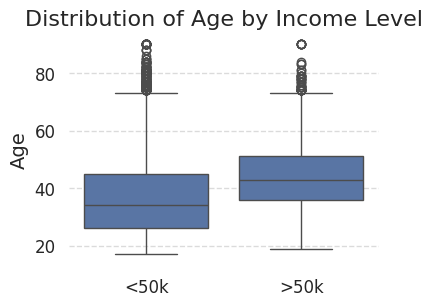

In [ ]:
plt.figure(figsize=(4, 3))

sns.boxplot(x='class', y='age', data=df)

plt.title('Distribution of Age by Income Level', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.xticks([0, 1], ['<50k', '>50k'], fontsize=12)
plt.yticks(fontsize=12)
sns.despine(top=True, left=True, bottom=True)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

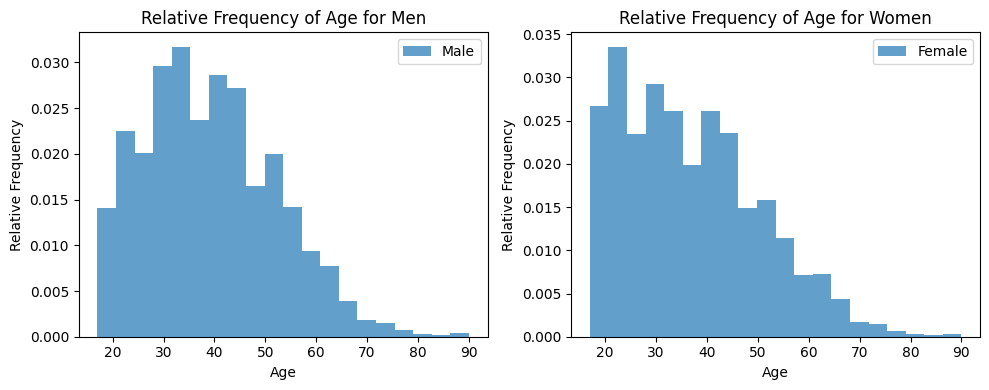

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

for ax, (sex, title) in zip(axes, [('Male', 'Men'), ('Female', 'Women')]):
    ax.hist(df[df['sex'] == sex]['age'], bins=20, alpha=0.7, label=sex, density=True)
    ax.set_title(f'Relative Frequency of Age for {title}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Relative Frequency')
    ax.legend()

plt.show()

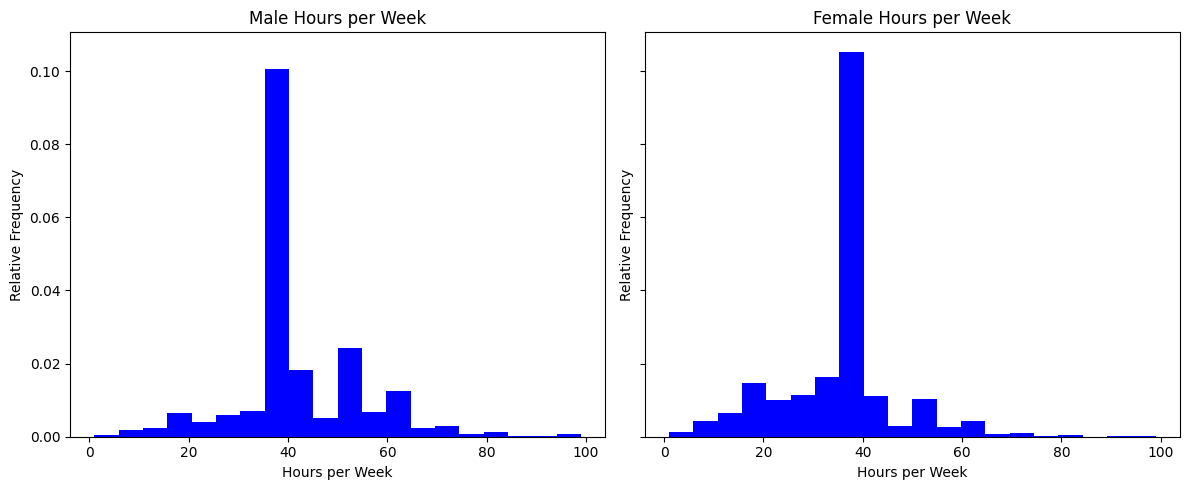

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True) # subplots
for i, sex in enumerate(["Male", "Female"]):
  gender_df = df[df["sex"]==sex]  # split the data by sex
  axes[i].hist(gender_df["hours-per-week"], color="blue", bins=20, density=True)
  axes[i].set_title(f"{sex} Hours per Week")
  axes[i].set_xlabel("Hours per Week")
  axes[i].set_ylabel("Relative Frequency")
plt.tight_layout()
plt.show()

In [ ]:
pd.crosstab(df["sex"], df["occupation"], values=df["class"], aggfunc="count", normalize="index") # these values are normalized across the rows, this is because men and women are not represented equally in ds

KeyError: 'sex'

In [ ]:
import geopandas as gpd
import numpy as np
!mkdir -p shapefile

!wget -P shapefile/ https://raw.githubusercontent.com/timagonch/incomeCensus/main/ne_110m_admin_0_countries.shp
!wget -P shapefile/ https://raw.githubusercontent.com/timagonch/incomeCensus/main/ne_110m_admin_0_countries.shx
!wget -P shapefile/ https://raw.githubusercontent.com/timagonch/incomeCensus/main/ne_110m_admin_0_countries.dbf
!wget -P shapefile/ https://raw.githubusercontent.com/timagonch/incomeCensus/main/ne_110m_admin_0_countries.prj


# Load the shapefile
shapefile_path = "shapefile/ne_110m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Assuming df contains 'class' and 'native-country'
df_countries = df[["class", "native-country"]]

# Map country names to align with GeoDataFrame
name_mapping = {
    'United-States': 'United States of America', 'Cuba': 'Cuba', 'Jamaica': 'Jamaica', 'India': 'India',
    'Mexico': 'Mexico', 'Puerto-Rico': 'Puerto Rico', 'Honduras': 'Honduras',
    'England': 'United Kingdom', 'Canada': 'Canada', 'Germany': 'Germany', 'Iran': 'Iran',
    'Philippines': 'Philippines', 'Poland': 'Poland', 'Columbia': 'Colombia',
    'Cambodia': 'Cambodia', 'Thailand': 'Thailand', 'Ecuador': 'Ecuador', 'Laos': 'Laos',
    'Taiwan': 'Taiwan', 'Haiti': 'Haiti', 'Portugal': 'Portugal',
    'Dominican-Republic': 'Dominican Republic', 'El-Salvador': 'El Salvador', 'France': 'France',
    'Guatemala': 'Guatemala', 'Italy': 'Italy', 'China': 'China', 'South-Korea': 'South Korea',
    'Japan': 'Japan', 'Yugoslavia': None, 'Peru': 'Peru',
    'Outlying-US(Guam-USVI-etc)': 'United States', 'Scotland': 'United Kingdom',
    'Trinadad&Tobago': 'Trinidad and Tobago', 'Greece': 'Greece', 'Nicaragua': 'Nicaragua',
    'Vietnam': 'Vietnam', 'Hong-Kong': 'Hong Kong', 'Ireland': 'Ireland', 'Hungary': 'Hungary',
    'Holand-Netherlands': 'Netherlands'
}
df_countries['native-country'] = df_countries['native-country'].replace(name_mapping)

# Calculate the percentage for each country
country_stats = df_countries.groupby('native-country')['class'].agg(['sum', 'count']).reset_index()
country_stats['percentage'] = (country_stats['sum'] / country_stats['count']) * 100

# Merge with GeoDataFrame
world = world.merge(
    country_stats,
    how="left",
    left_on="ADMIN",
    right_on="native-country",
    suffixes=('', '_stats')
)

# Assign NaN for "No Data" countries
world['percentage'] = np.where(world['percentage'].isna(), -1, world['percentage'])

fig = px.choropleth(
    world,
    geojson=world.geometry,
    locations=world.index,
    color="percentage",
    hover_name="ADMIN",
    title="Percentage of People Making Over $50k by Country",
    color_continuous_scale="amp",
    labels={'percentage': 'Percentage'},
    range_color=(0, 45)  # Adjusted range for better contrast
)

fig.update_layout(
    title={
        'text': "Percentage of People Making Over $50k by Country",
        'x': 0.5,
        'xanchor': 'center'
    },
    coloraxis_colorbar=dict(
        title="Percentage",
        tickvals=[0, 5, 10, 15, 20,25,30,35,40,45],  # Updated ticks for new range
        ticktext=["0%", "5%", "10%", "15%","20%","25%","30%" ,"35%","40%","45%"],
    ),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth"
    ),
    margin={"r": 0, "t": 30, "l": 0, "b": 0},
    width=700,
    height=500
)

fig.show()

## Random Forest Model

 Remove "fnlweight" and "education" since fnlweight is not an explainable variable (we have no idea what it means and it is not correlated with income) and education is already explained by education_num

In [ ]:
df = df.drop(columns=['fnlwgt', 'education', 'relationship'])

We use one-hot encoding to convert our categorical columns into numerical ones so that we can use them in our Random Forest model which only expects numericalv values.

In [ ]:
# List of categorical features
categorical_features = ['workclass', 'marital-status','occupation', 'race', 'sex', 'native-country']
# One-hot encode the categorical features and update the DataFrame
df = pd.get_dummies(df, columns=categorical_features, drop_first=False)
df = df.astype(int)

Within this code block we are training our Random Forest model. We use a train-test split to evaluate our model on unseen data. However, we want want to make sure we use the best hyperparameters for our random forest model (hyperparameters like n_estimators (the number of decision trees used), max_depth, min_samples_split). In order to identify these best hyperparameters we use Grid Search to have sci-kit learn try different hyperparameters for our model and tell us which hyperparameters make the accuracy the highest. We were able to achieve an overall highest accuracy of ~85%

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

# eventually this will be just dropping class once we one hot encode
X = df.drop(columns=["class"])  # features
y = df["class"]  # target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=22)

rf_model = RandomForestClassifier(random_state=22)

# instantiate different hyperparameters to try for model
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

optimized_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,cv=5,
                                 verbose=2, random_state=42, n_jobs=-1, scoring="accuracy")

optimized_rf.fit(X_train, y_train)
print("Highest accuracy achieved: ", max(optimized_rf.cv_results_["mean_test_score"]))


print("Best parameters found from Grid Search: ", optimized_rf.best_params_)
rf_model = optimized_rf.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Highest accuracy achieved:  0.8574525879302742
Best parameters found from Grid Search:  {'n_estimators': 20, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


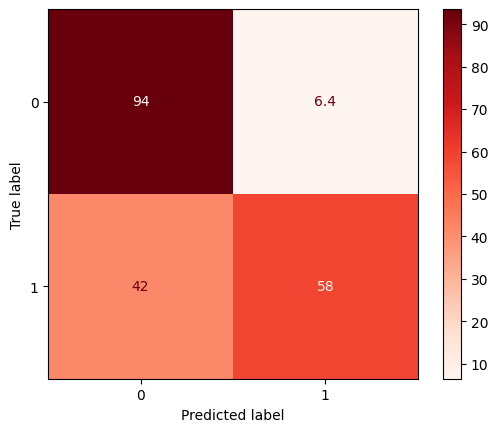

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

cm_percentage = cm.astype('float') / cm.sum(axis=1, keepdims=True) * 100

# Display the confusion matrix with percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=optimized_rf.classes_)
disp.plot(cmap="Reds")

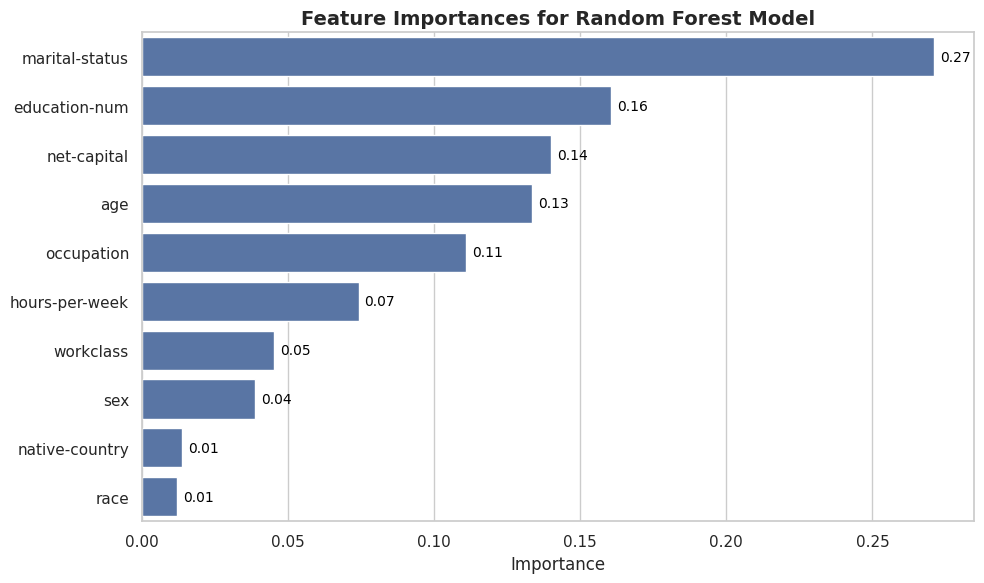

In [ ]:
from collections import defaultdict

# calculate grouped feature importances
feature_importances = rf_model.feature_importances_
feature_names = X.columns

feature_importance_dict = {column_name: importance for column_name, importance in zip(feature_names, feature_importances)}

# group the one hot encoded columns into the original columns and add their importance scores
grouped_importances = defaultdict(float)
for feature, importance in feature_importance_dict.items():
    base_feature = feature.split("_")[0]
    grouped_importances[base_feature] += importance

grouped_importances_df = pd.DataFrame(
    grouped_importances.items(), columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

# plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

barplot = sns.barplot(
    data=grouped_importances_df,
    x="Importance",
    y = "Feature"
)

# adds value labels to bar
for i, bar in enumerate(barplot.patches):
    plt.text(
        bar.get_width() + 0.002,
        bar.get_y() + bar.get_height() / 2,
        f"{bar.get_width():.2f}",
        ha="left",
        va="center",
        fontsize=10,
        color="black"
    )

plt.title("Feature Importances for Random Forest Model", fontsize=14, weight="bold")
plt.xlabel("Importance", fontsize=12)
plt.ylabel("", fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
y_pred = rf_model.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(precision, recall)

# model does a decent job at correctly identifying people that make over 50k, but misses out
# on identifying all the people that make over 50k

0.7531645569620253 0.6084038983863237
